In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import path as ospath
from sys import path as syspath

In [2]:
syspath.append(ospath.abspath('/Users/andrewwork/thesis/reg_stokeslets/src/3d/'))

In [3]:
f = np.array([1, 0])

In [4]:
def stokeslet_2d(xe, xs, eps):
    r = xe - xs
    r2e = np.sqrt(np.sum(r**2, axis=-1) + eps**2)
    term1 = np.log(r2e + eps) - eps * (r2e + 2*eps) / (r2e * (r2e + eps))
    term1 = -f / (4 * np.pi) * term1[:, None]
    
    term2 = (r2e + 2*eps) / (r2e * (r2e + eps)**2)
    term2 = np.dot(r, f)[:, None] * r / (4 * np.pi) * term2[:, None]
    return term1 + term2

In [5]:
def phi(xe, xs, eps):
    r2 = np.sqrt(np.sum((xe - xs)**2, axis=-1))
    return 3 * eps**3 / (np.pi * r2 + eps**2)**(5/2)

In [18]:
num = 20
grid = np.linspace(-5, 5, num=num)
x_tmp, y_tmp = np.meshgrid(grid, grid)
xe = np.stack((x_tmp, y_tmp), axis=-1).reshape((-1, 2))

In [19]:
xs = np.array([0, 0])
eps = 0.5

In [20]:
p = f * phi(xe, xs, eps)[:, None]
pn = (p / np.linalg.norm(p, axis=-1)[:, None]) * np.minimum(np.linalg.norm(p, axis=-1)[:, None], 1)
# pn = p

In [21]:
p.shape

(400, 2)

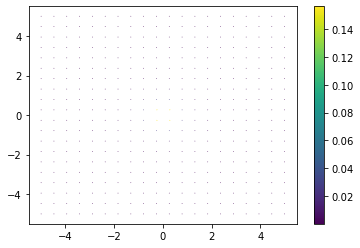

In [22]:
plt.quiver(xe[:, 0], xe[:, 1], pn[:, 0], pn[:, 1], np.linalg.norm(p, axis=-1), scale=30)
plt.colorbar()
plt.show()

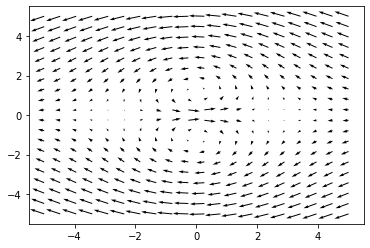

In [25]:
s = stokeslet_2d(xe, xs, eps)
plt.quiver(xe[:, 0], xe[:, 1], s[:, 0], s[:, 1])

In [27]:
s[:,0]

array([-0.11587505, -0.11605877, -0.11670372, -0.11781375, -0.11934556,
       -0.12119107, -0.12316716, -0.12502357, -0.12647843, -0.12728065,
       -0.12728065, -0.12647843, -0.12502357, -0.12316716, -0.12119107,
       -0.11934556, -0.11781375, -0.11670372, -0.11605877, -0.11587505,
       -0.10733467, -0.10702768, -0.1072514 , -0.10804925, -0.10941568,
       -0.11126556, -0.11340679, -0.11553445, -0.11726909, -0.11824873,
       -0.11824873, -0.11726909, -0.11553445, -0.11340679, -0.11126556,
       -0.10941568, -0.10804925, -0.1072514 , -0.10702768, -0.10733467,
       -0.09844497, -0.09747048, -0.09707342, -0.09735127, -0.09836109,
       -0.10007313, -0.10231524, -0.10473403, -0.10682023, -0.108039  ,
       -0.108039  , -0.10682023, -0.10473403, -0.10231524, -0.10007313,
       -0.09836109, -0.09735127, -0.09707342, -0.09747048, -0.09844497,
       -0.0893461 , -0.08749888, -0.08622828, -0.08569589, -0.08604902,
       -0.08736205, -0.08954246, -0.09222621, -0.0947461 , -0.09